# 1 Investigating Property Data

## Importing libraries

In [2]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd  
import math
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt

## 1.1 Data Collection

### 1.11 Function for scraping listing data

In [2]:
def get_listing_summary(result_set, county):
    
    listing_dict = {'County': [],
        'Property ID': [],
        'Price per month': [],
        'Address': [],
        'Property Description': [],
        'Date of Listing': []}
    
    for result in result_set:
        
        property_id = result['id']
        price_per_month = result.find('p', class_='_170k6632 _16fktr6').text
        address = result.find('h3', class_='_1ankud52 _16fktr9').text
        property_description = result.find('h2', class_='_1ankud51 _16fktr8').text
        date_of_listing = result.find('li', class_='_18cib8e1').text
        
        listing_dict['County'].append(county)
        listing_dict['Property ID'].append(property_id)
        listing_dict['Price per month'].append(price_per_month)
        listing_dict['Address'].append(address)
        listing_dict['Property Description'].append(property_description)
        listing_dict['Date of Listing'].append(date_of_listing)
        
    return(pd.DataFrame(listing_dict))


### 1.12 Function for extracting URLs

In [3]:
def URL_extractor(county):
    county = county.replace("&", "and")
    string1 = county.replace(" ", "-")
    string2 = county.replace(" ", "%")
    URL = "https://www.zoopla.co.uk/to-rent/property/" + string1 + "/?pets_allowed=true&price_frequency=per_month&q=" + string2 + "&radius=0&results_sort=lowest_price&search_source=to-rent"
    return URL

### 1.13 Main function for data collection

In [5]:
def data_extractor(counties):
       
    listing_dict = {'County': [],
            'Property ID': [],
            'Price per month': [],
            'Address': [],
            'Property Description': [],
            'Date of Listing': []}
    
    data = pd.DataFrame(listing_dict)
    
    for county in counties:
        
        curr_status = False
        page = 0

        try:

            while [curr_status == False]:
                driver = webdriver.Chrome()
                url = URL_extractor(county) 
                page += 1
                if page != 1:
                    url = url + "&pn=" + str(page)
                driver.get(url)

                response = BeautifulSoup(driver.page_source, 'html.parser')
                status = response.find_all('div', class_='_13wnc6k2')
                curr_status = status[0].find('a')['aria-disabled']

                listings = response.find_all('div', class_='f0xnzq2')   
                page_data = get_listing_summary(listings, county)
                data = pd.concat([data, page_data], ignore_index=True)

                driver.quit()

        except IndexError:
            print("All data for {} has been collected".format(county))
            
    return data

In [155]:
counties = ["Bath & N E Somerset",
    "Bedfordshire",
    "Berkshire",
    "Bristol",
    "Buckinghamshire",
    "Cambridgeshire",
    "Cheshire",
    "City of London",
    "Cornwall",
    "Cumbria",
    "Derbyshire",
    "Devon",
    "Dorset",
    "Durham",
    "East Riding of Yorkshire",
    "East Sussex",
    "Essex",
    "Gloucestershire",
    "Greater London",
    "Greater Manchester",
    "Hampshire",
    "Herefordshire",
    "Hertfordshire",
    "Isle of Wight",
    "Kent",
    "Lancashire",
    "Leicestershire",
    "Lincolnshire",
    "Merseyside",
    "Norfolk",
    "Northamptonshire",
    "Northumberland",
    "North Yorkshire",
    "Nottinghamshire",
    "Oxfordshire",
    "Rutland",
    "Shropshire",
    "Somerset",
    "South Yorkshire",
    "Staffordshire",
    "Suffolk",
    "Surrey",
    "Tyne and Wear",
    "Warwickshire",
    "West Midlands",
    "West Sussex",
    "West Yorkshire",
    "Wiltshire",
   "Worcestershire"
]

In [6]:
data = data_extractor(counties)

All data for Bath & N E Somerset has been collected
All data for Bedfordshire has been collected
All data for Berkshire has been collected
All data for Bristol has been collected
All data for Buckinghamshire has been collected
All data for Cambridgeshire has been collected
All data for Cheshire has been collected
All data for City of London has been collected
All data for Cornwall has been collected
All data for Cumbria has been collected
All data for Derbyshire has been collected
All data for Devon has been collected
All data for Dorset has been collected
All data for Durham has been collected
All data for East Riding of Yorkshire has been collected
All data for East Sussex has been collected
All data for Essex has been collected
All data for Gloucestershire has been collected
All data for Greater London has been collected
All data for Greater Manchester has been collected
All data for Hampshire has been collected
All data for Herefordshire has been collected
All data for Hertfordshir

In [8]:
data.to_csv("listings_data.csv")

## 1.2 Which are the top 5 counties with the most pet-welcomed listings?

In [3]:
data = pd.read_csv("listings_data.csv", index_col=0)

In [4]:
top_5_counties = data.County.value_counts()[:5].index.tolist()
top_5_counties

['West Midlands', 'Greater Manchester', 'Surrey', 'Kent', 'West Yorkshire']

In [5]:
data

,County,Property ID,Price per month,Address,Property Description,Date of Listing
0,Bath & N E Somerset,listing_64794678,£825 pcm,"Dudwell Lane, Chewton Mendip, Nr Radstock BA3",2 bed bungalow to rent,Listed on 5th Jun 2023
1,Bath & N E Somerset,listing_64829362,"£1,795 pcm","The Hollow, Bath BA2",2 bed semi-detached house to rent,Listed on 9th Jun 2023
2,Bath & N E Somerset,listing_61754783,"£2,000 pcm","Norfolk Buildings, Bath BA1",1 bed flat to rent,Listed on 14th Dec 2022
3,Bath & N E Somerset,listing_64697636,"£2,250 pcm","Old Brewery Place, Oakhill, Nr Radstock BA3",4 bed property to rent,Listed on 23rd May 2023
4,Bath & N E Somerset,listing_60256022,"£2,400 pcm","Norfolk Buildings, Bath BA1",1 bed flat to rent,Listed on 6th Apr 2023
...,...,...,...,...,...,...
2756,Worcestershire,listing_62407301,"£1,650 pcm","Solent Place, Evesham WR11",4 bed detached house to rent,Listed on 26th Apr 2023
2757,Worcestershire,listing_64881285,"£2,200 pcm","Gilberts End Lane, Hanley Castle, Worcester WR8",4 bed detached house to rent,Listed on 15th Jun 2023
2758,Worcestershire,listing_64317465,"£2,250 pcm","Crown East Lane, Worcester WR2",3 bed semi-detached house to rent,Listed on 2nd Apr 2023
2759,Worcestershire,listing_64651338,"£2,250 pcm","Wick Road, Little Comberton, Pershore WR10",4 bed detached house to rent,Listed on 17th May 2023


## 1.3 Feature Extraction

### 1.3.1 Extracting property type from desciption

In [8]:
def type_extractor(description):

    if 'bed' in description:
        type_ = re.findall(r'bed (.*?) to', description, re.IGNORECASE)
    else:
        type_ = re.findall(r'(.*?) to', description, re.IGNORECASE)
    return type_

In [257]:
data['Property Type'] = data['Property Description'].apply(lambda x: type_extractor(x))
data['Property Type'] = data['Property Type'].apply(lambda x: "".join(x))

### 1.3.2 Is the property detached, semi-detached or terraced?

In [10]:
def feature_extractor(type_):
    
    if re.search(r'semi-detached', type_, re.IGNORECASE):
        feature = "Semi-detached"
    elif re.search(r'detached', type_, re.IGNORECASE):
        feature = "Detached"
    elif re.search(r'terraced', type_, re.IGNORECASE):
        feature = "Terraced"
    else:
        feature = "Other"
        
    return feature

In [258]:
data['Property Feature'] = data['Property Description'].apply(lambda x: feature_extractor(x))

### 1.3.3 Extracting number of bedrooms

In [12]:
def room_extractor(description):
    
    search = re.search(r'(\d+)\s*bed', description, re.IGNORECASE)
    if search:
        num_bedrooms = int(search.group(1))
    else:
        num_bedrooms = 'N/A'
    return num_bedrooms

In [259]:
data['Number of Bedrooms'] = data['Property Description'].apply(lambda x: room_extractor(x))

### 1.3.4 Extracting price and bins

In [14]:
def price_extractor(price):
    
    search = re.search(r'£([\d,]+)', price, re.IGNORECASE)
    if search:
        price = int(search.group(1).replace(',', ''))
    else:
        price = 'N/A'
    return price

In [260]:
data['Price per month'] = data['Price per month'].apply(lambda x: price_extractor(x))

In [ ]:
data['Price per month'].describe()

In [268]:
price_bin_edges = [0, 500, 1000, 2000, 3000, 5000, float('inf')]
data['Price_bin'] = pd.cut(data['Price per month'], bins=price_bin_edges, labels=['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'Very Expensive', 'Out of range'])

In [269]:
filtered_data = data.loc[data.County.isin(top_5_counties)].reset_index(drop=True)

## 1.4 Initial Plots 

### 1.4.1 Distribution by Property Type

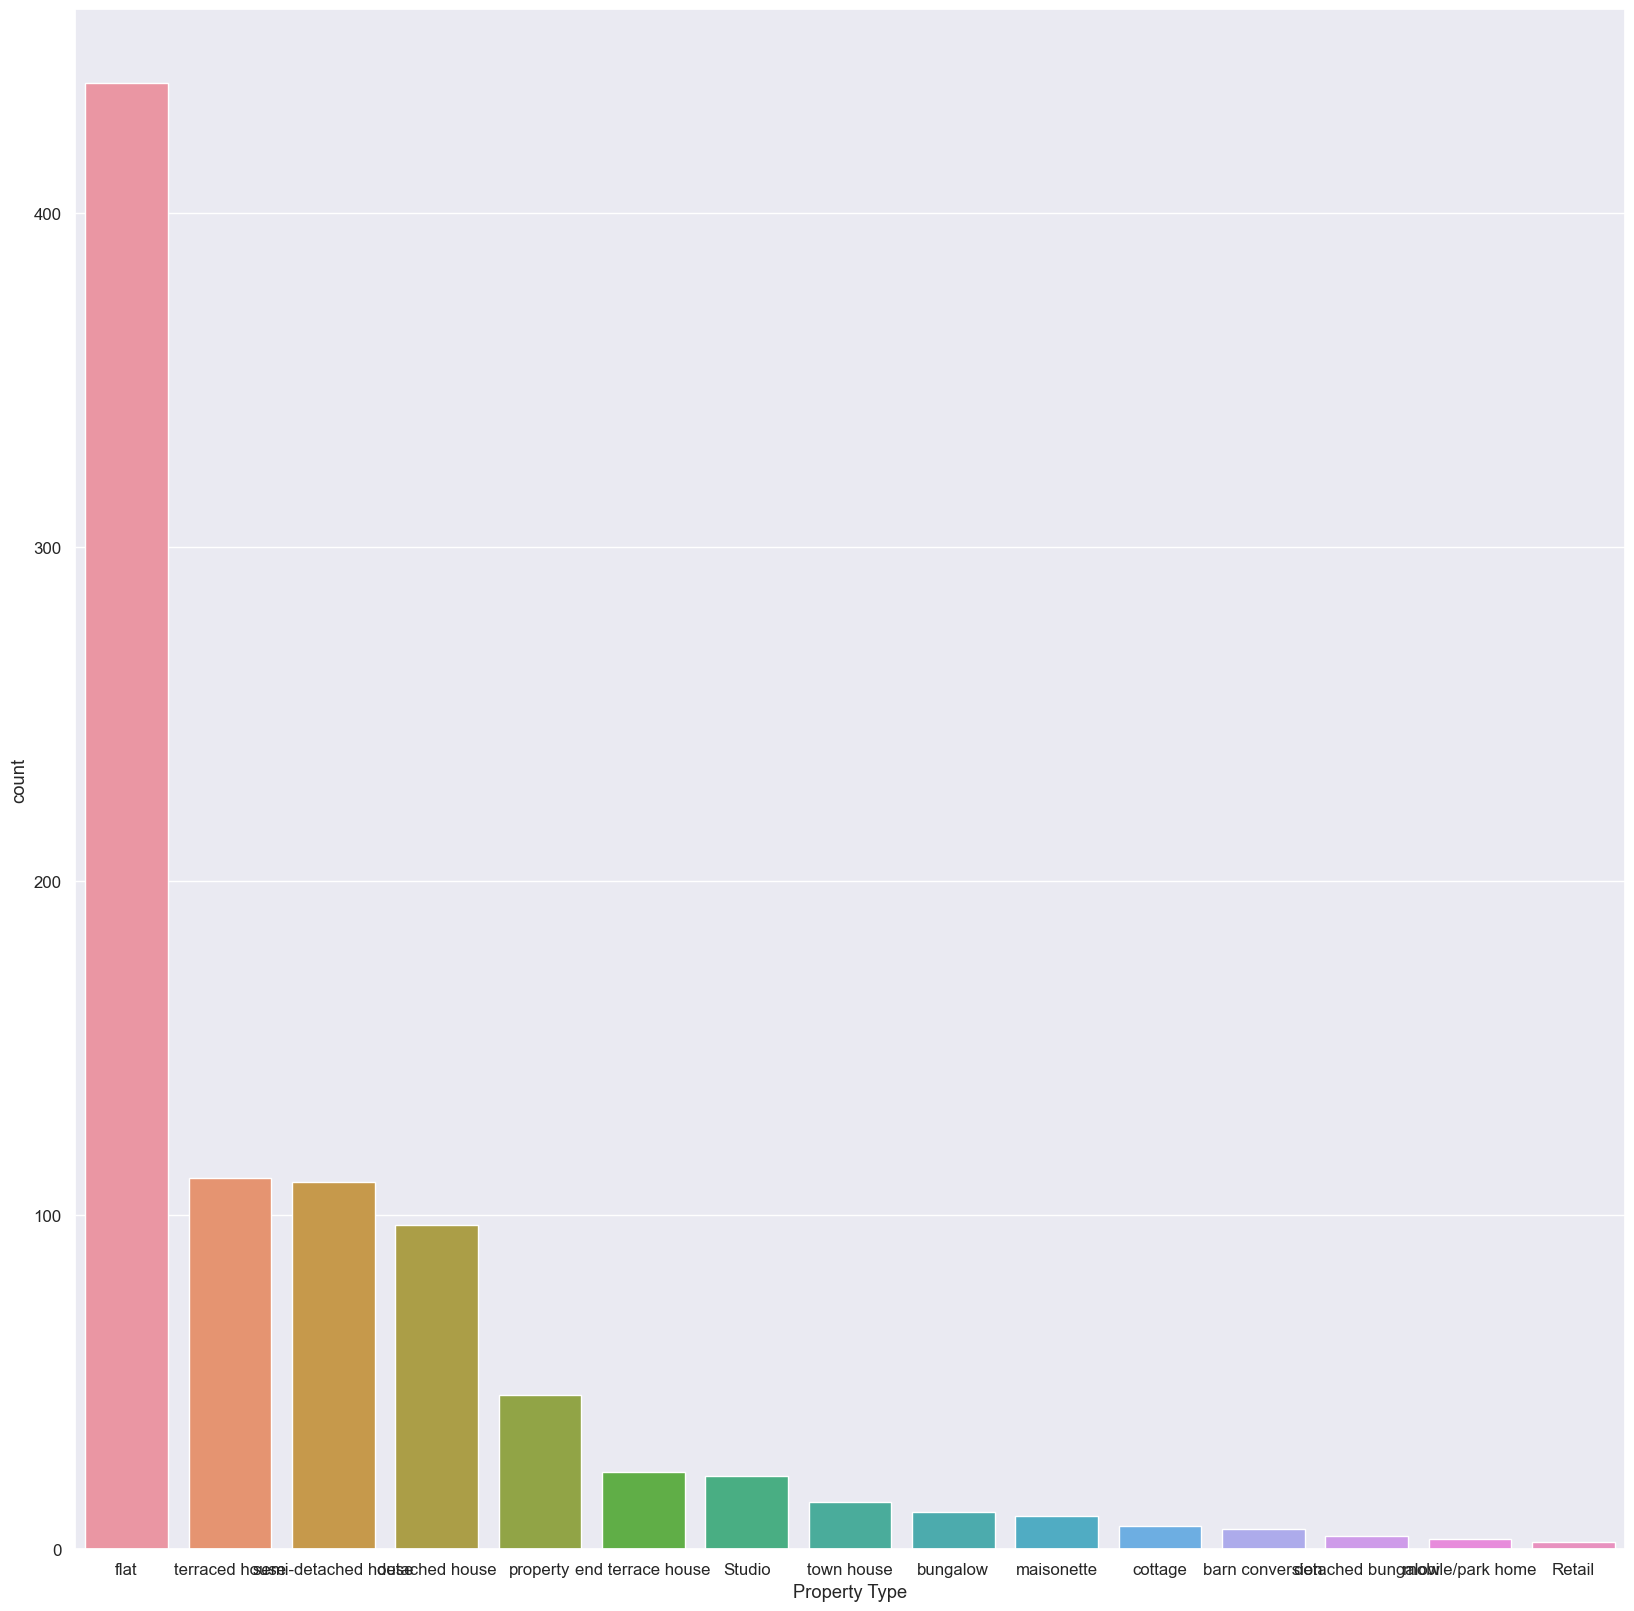

In [263]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.1)
sns.countplot(x='Property Type', order=filtered_data['Property Type'].value_counts()[:15].index, data = filtered_data)
plt.show()

### 1.4.2 Distribution by property type and number of bedrooms

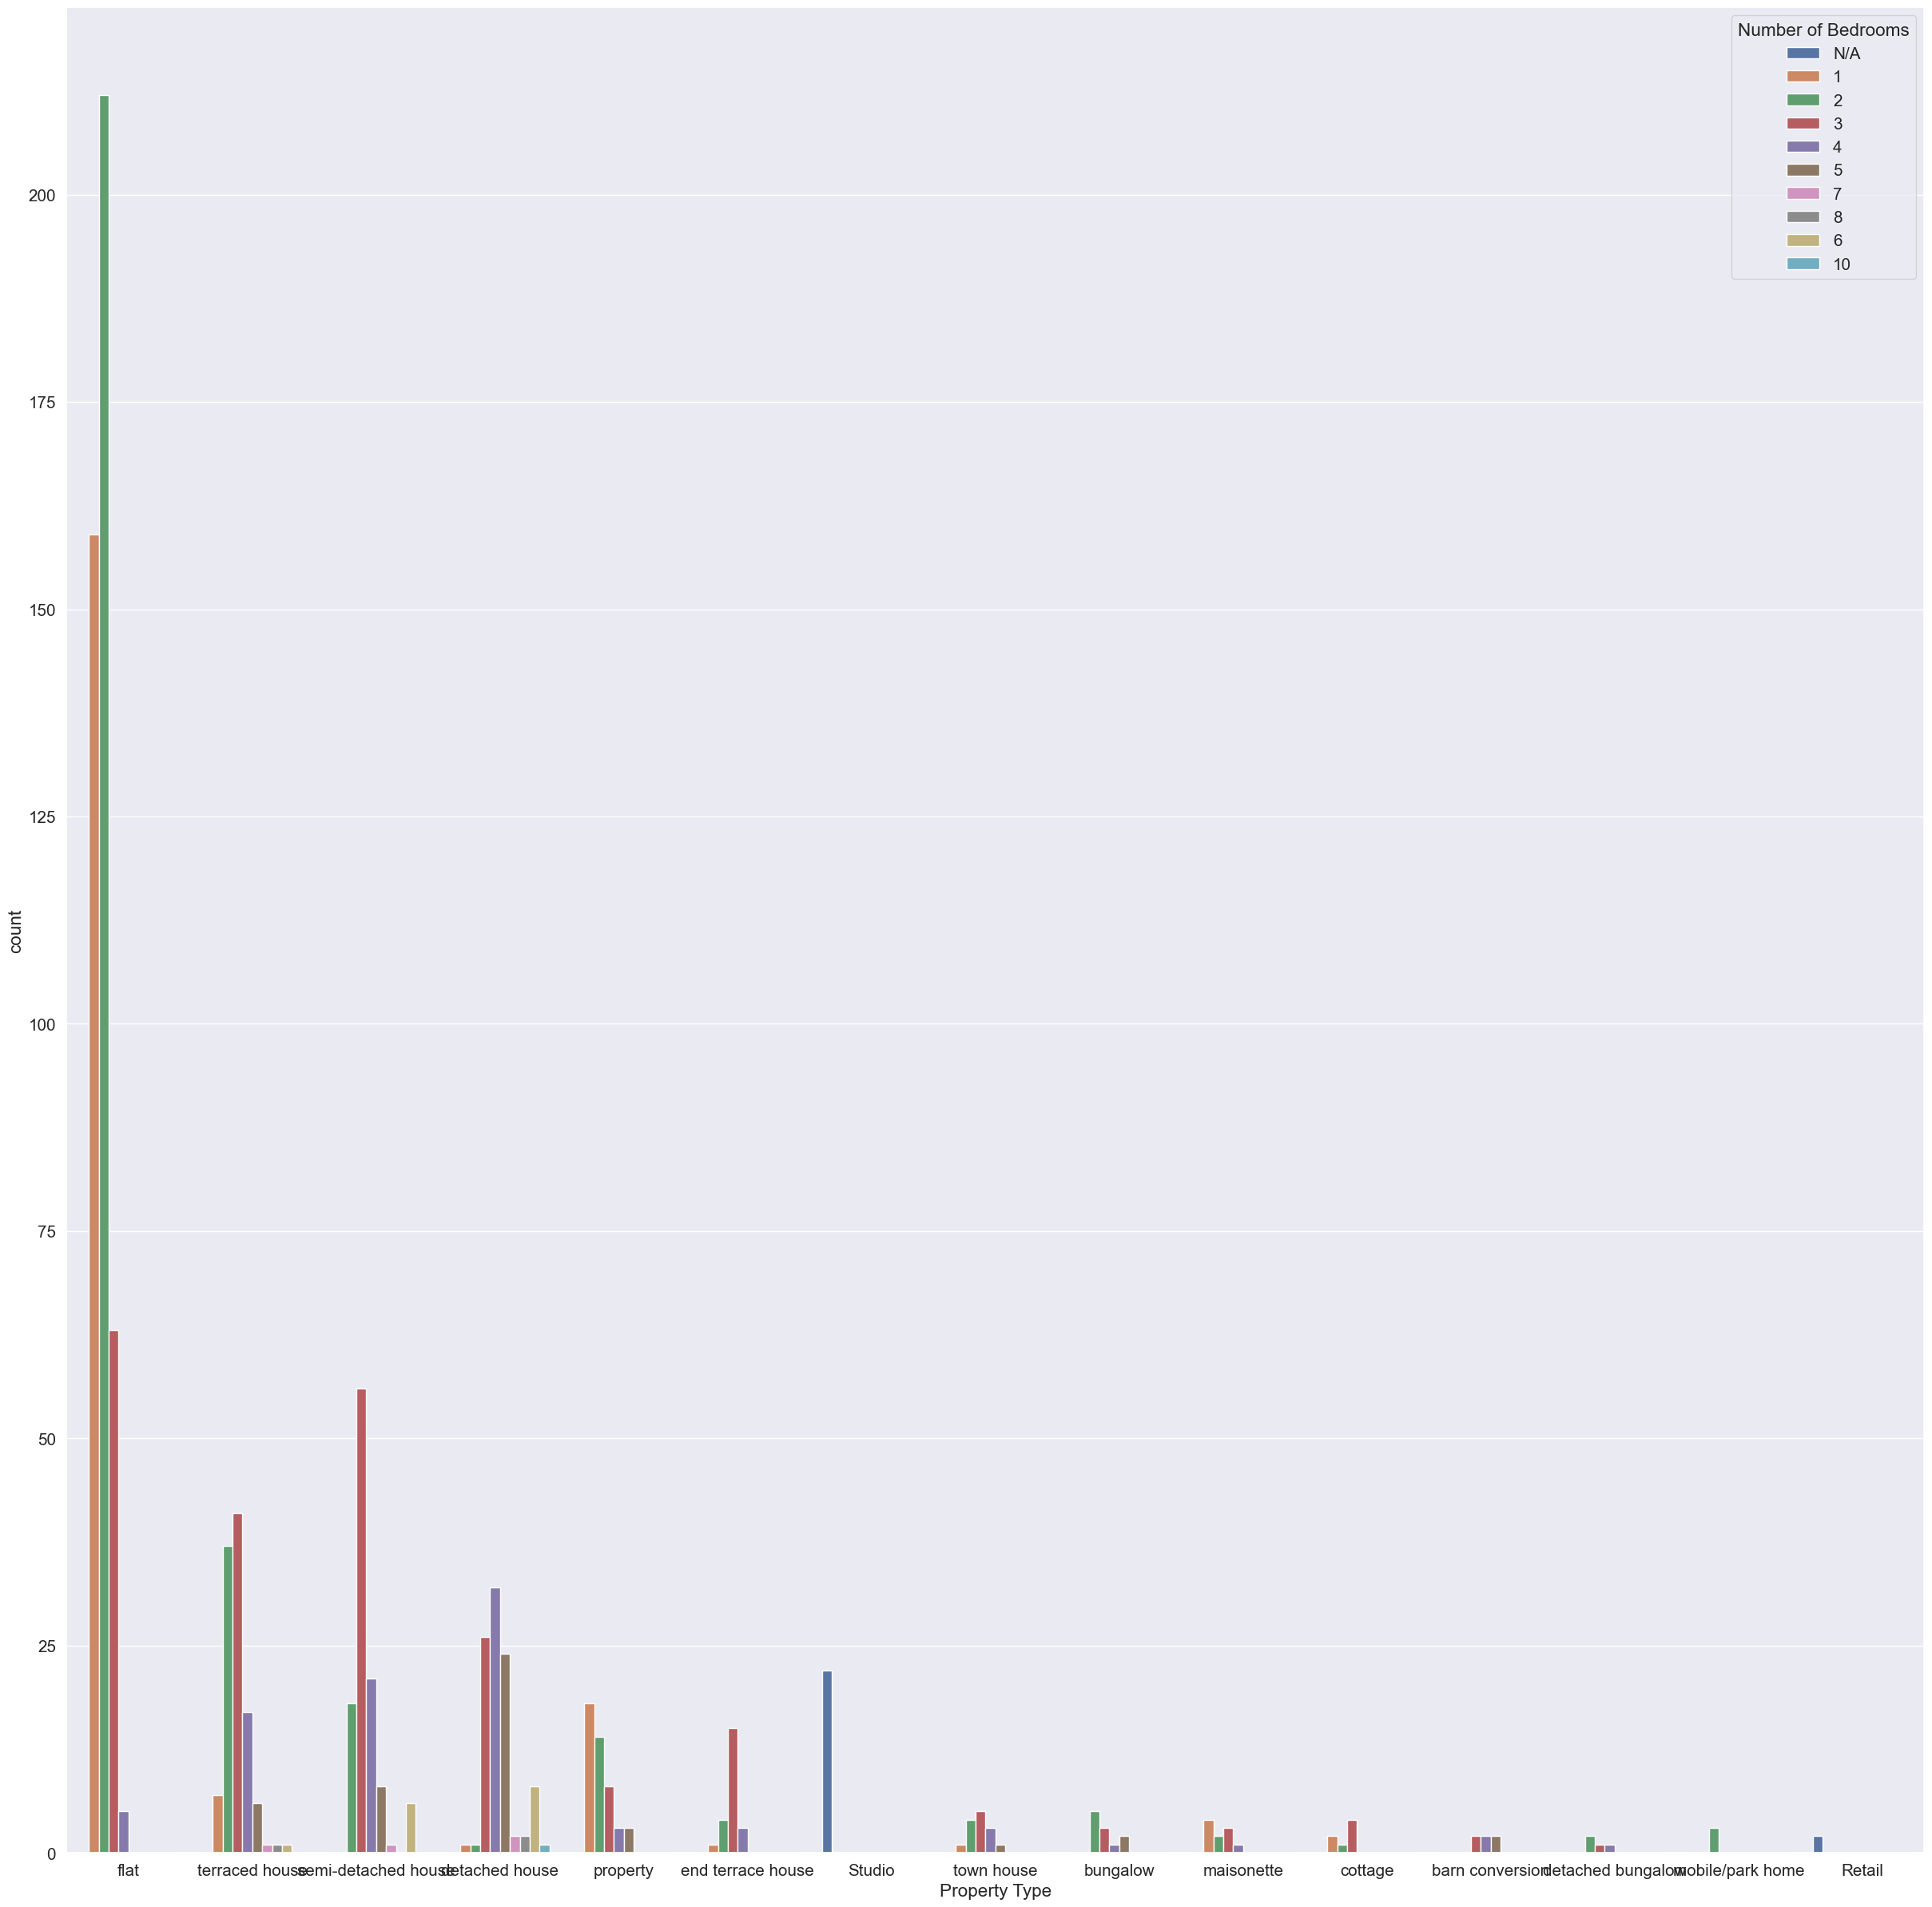

In [265]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.35)
sns.countplot(x='Property Type', order=filtered_data['Property Type'].value_counts()[:15].index, hue = 'Number of Bedrooms', data = filtered_data)
plt.show()

### 1.4.3 Distribution of Property Type across top 5 counties

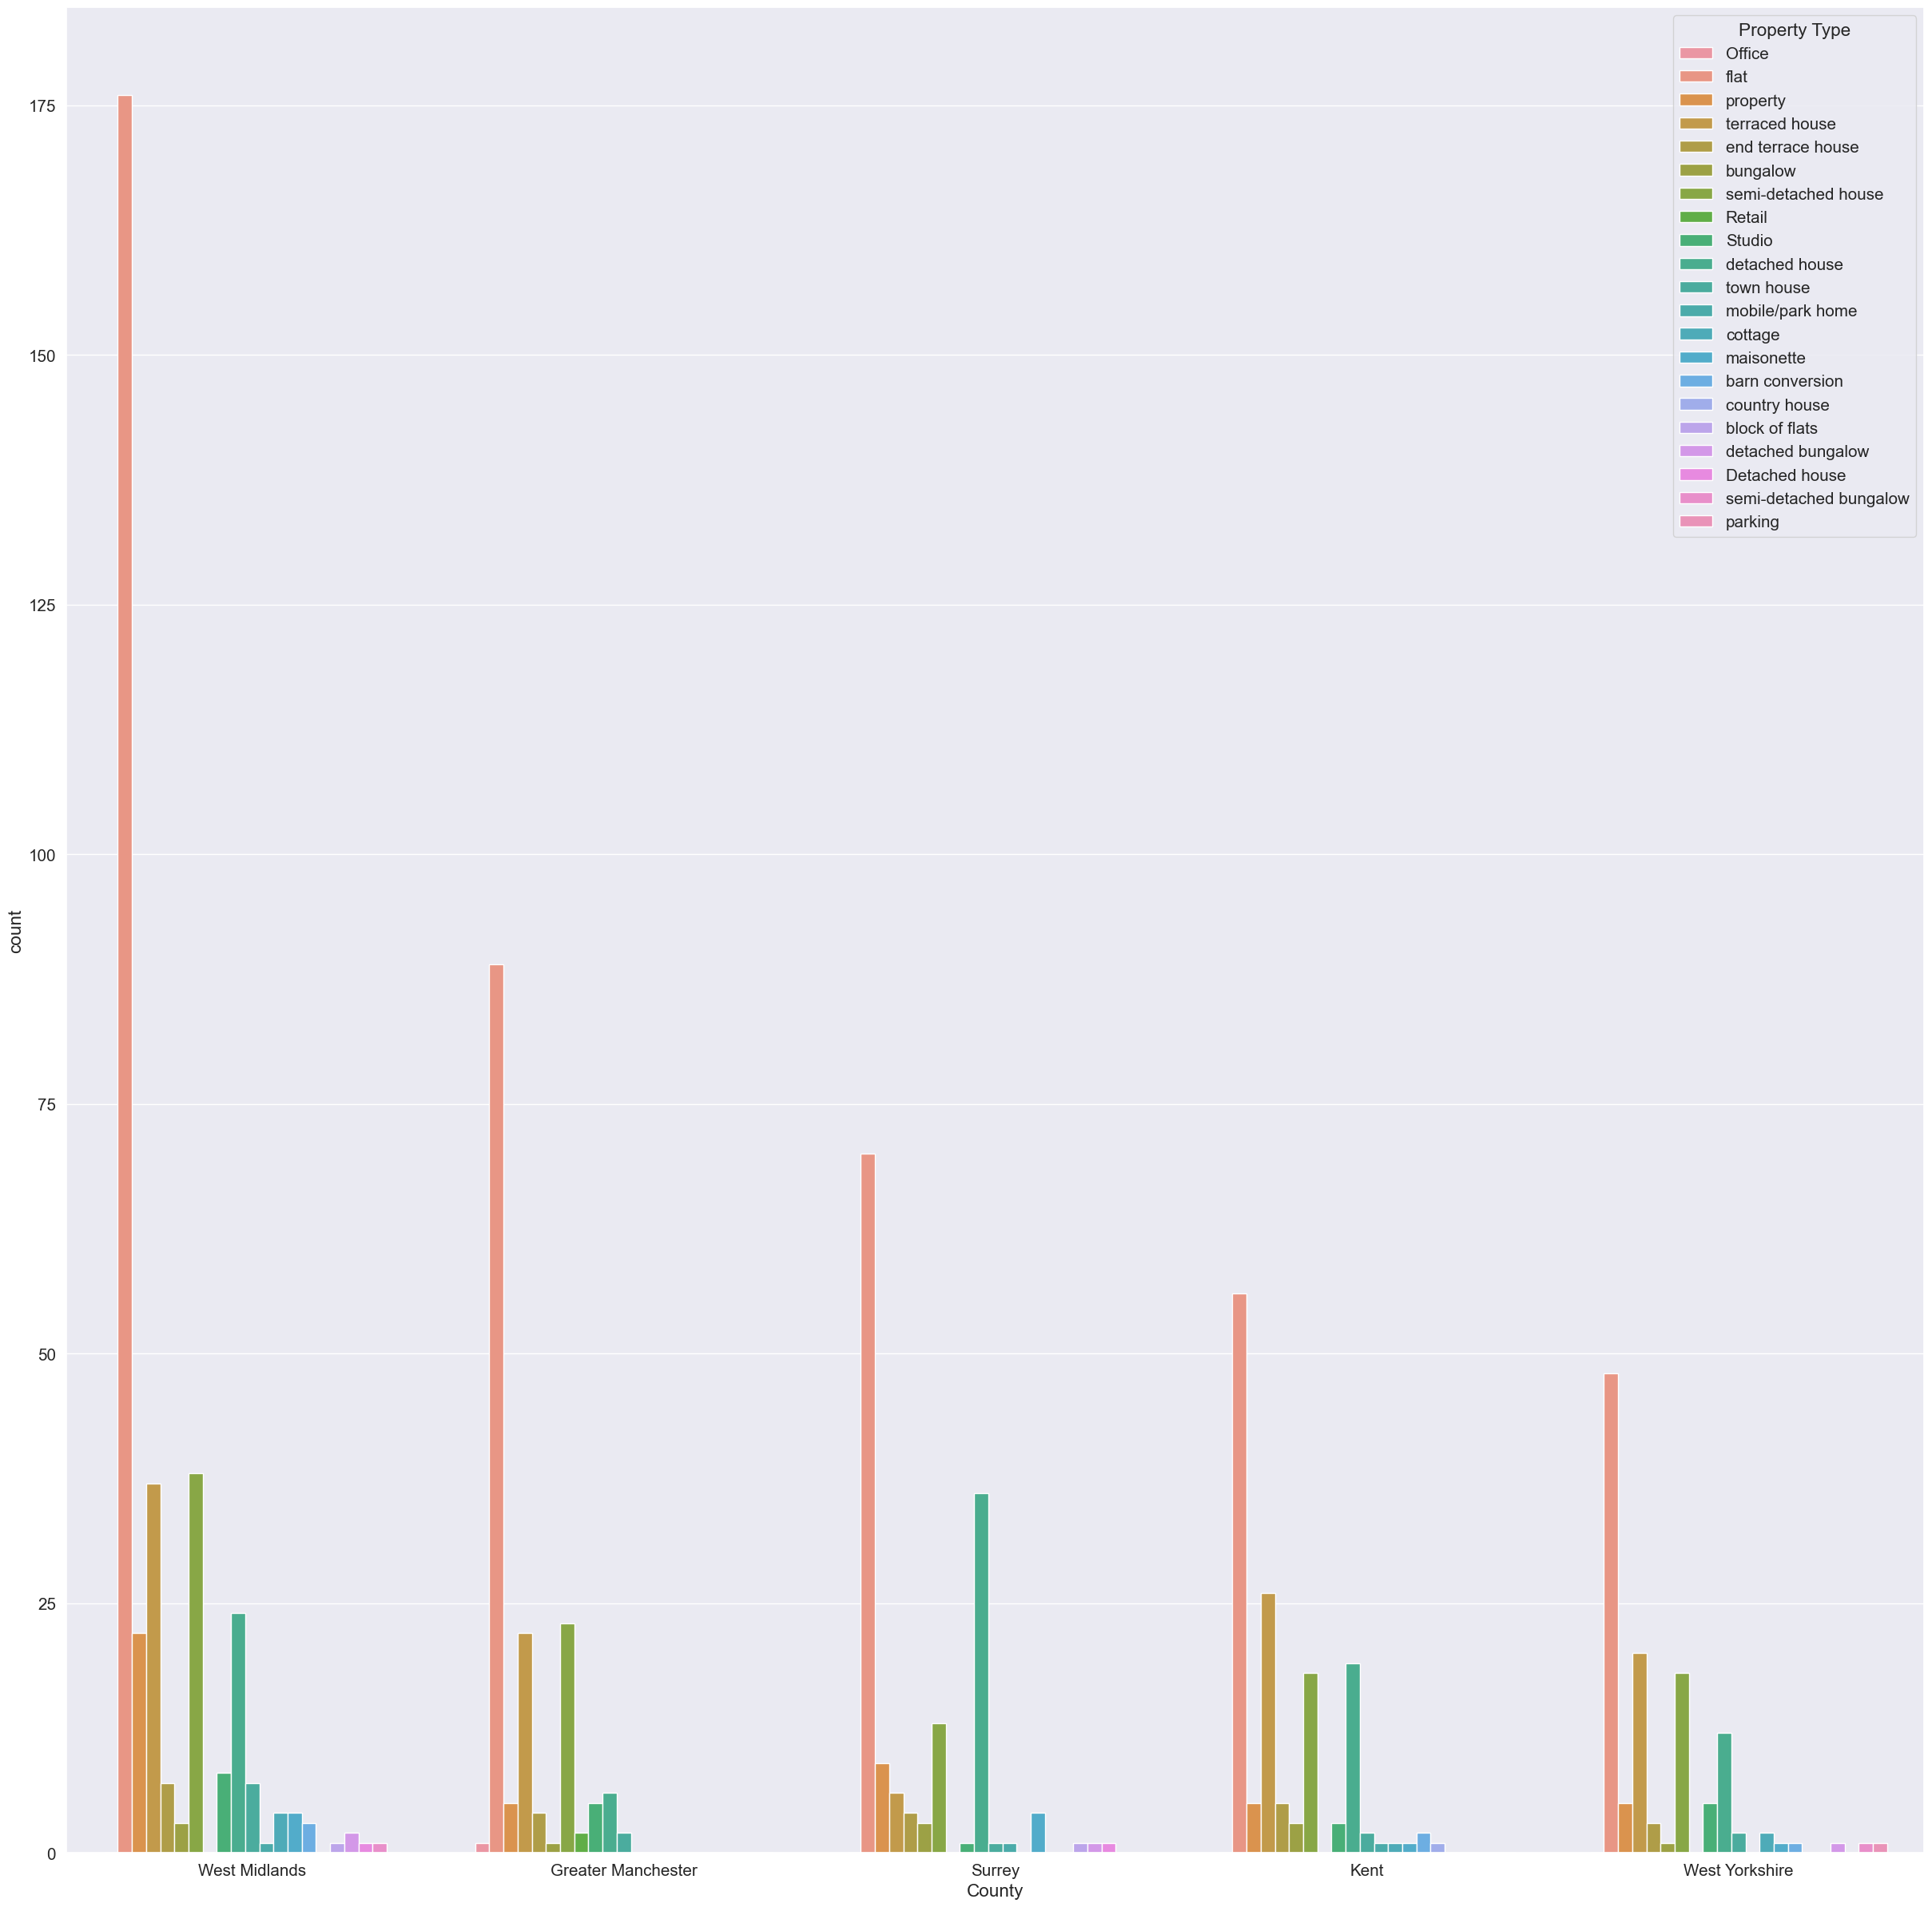

In [266]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.35)
sns.countplot(x='County', order=filtered_data['County'].value_counts().index, hue = 'Property Type', data = filtered_data)
plt.show()

### 1.4.4 Classified price of listings compared to Property Type

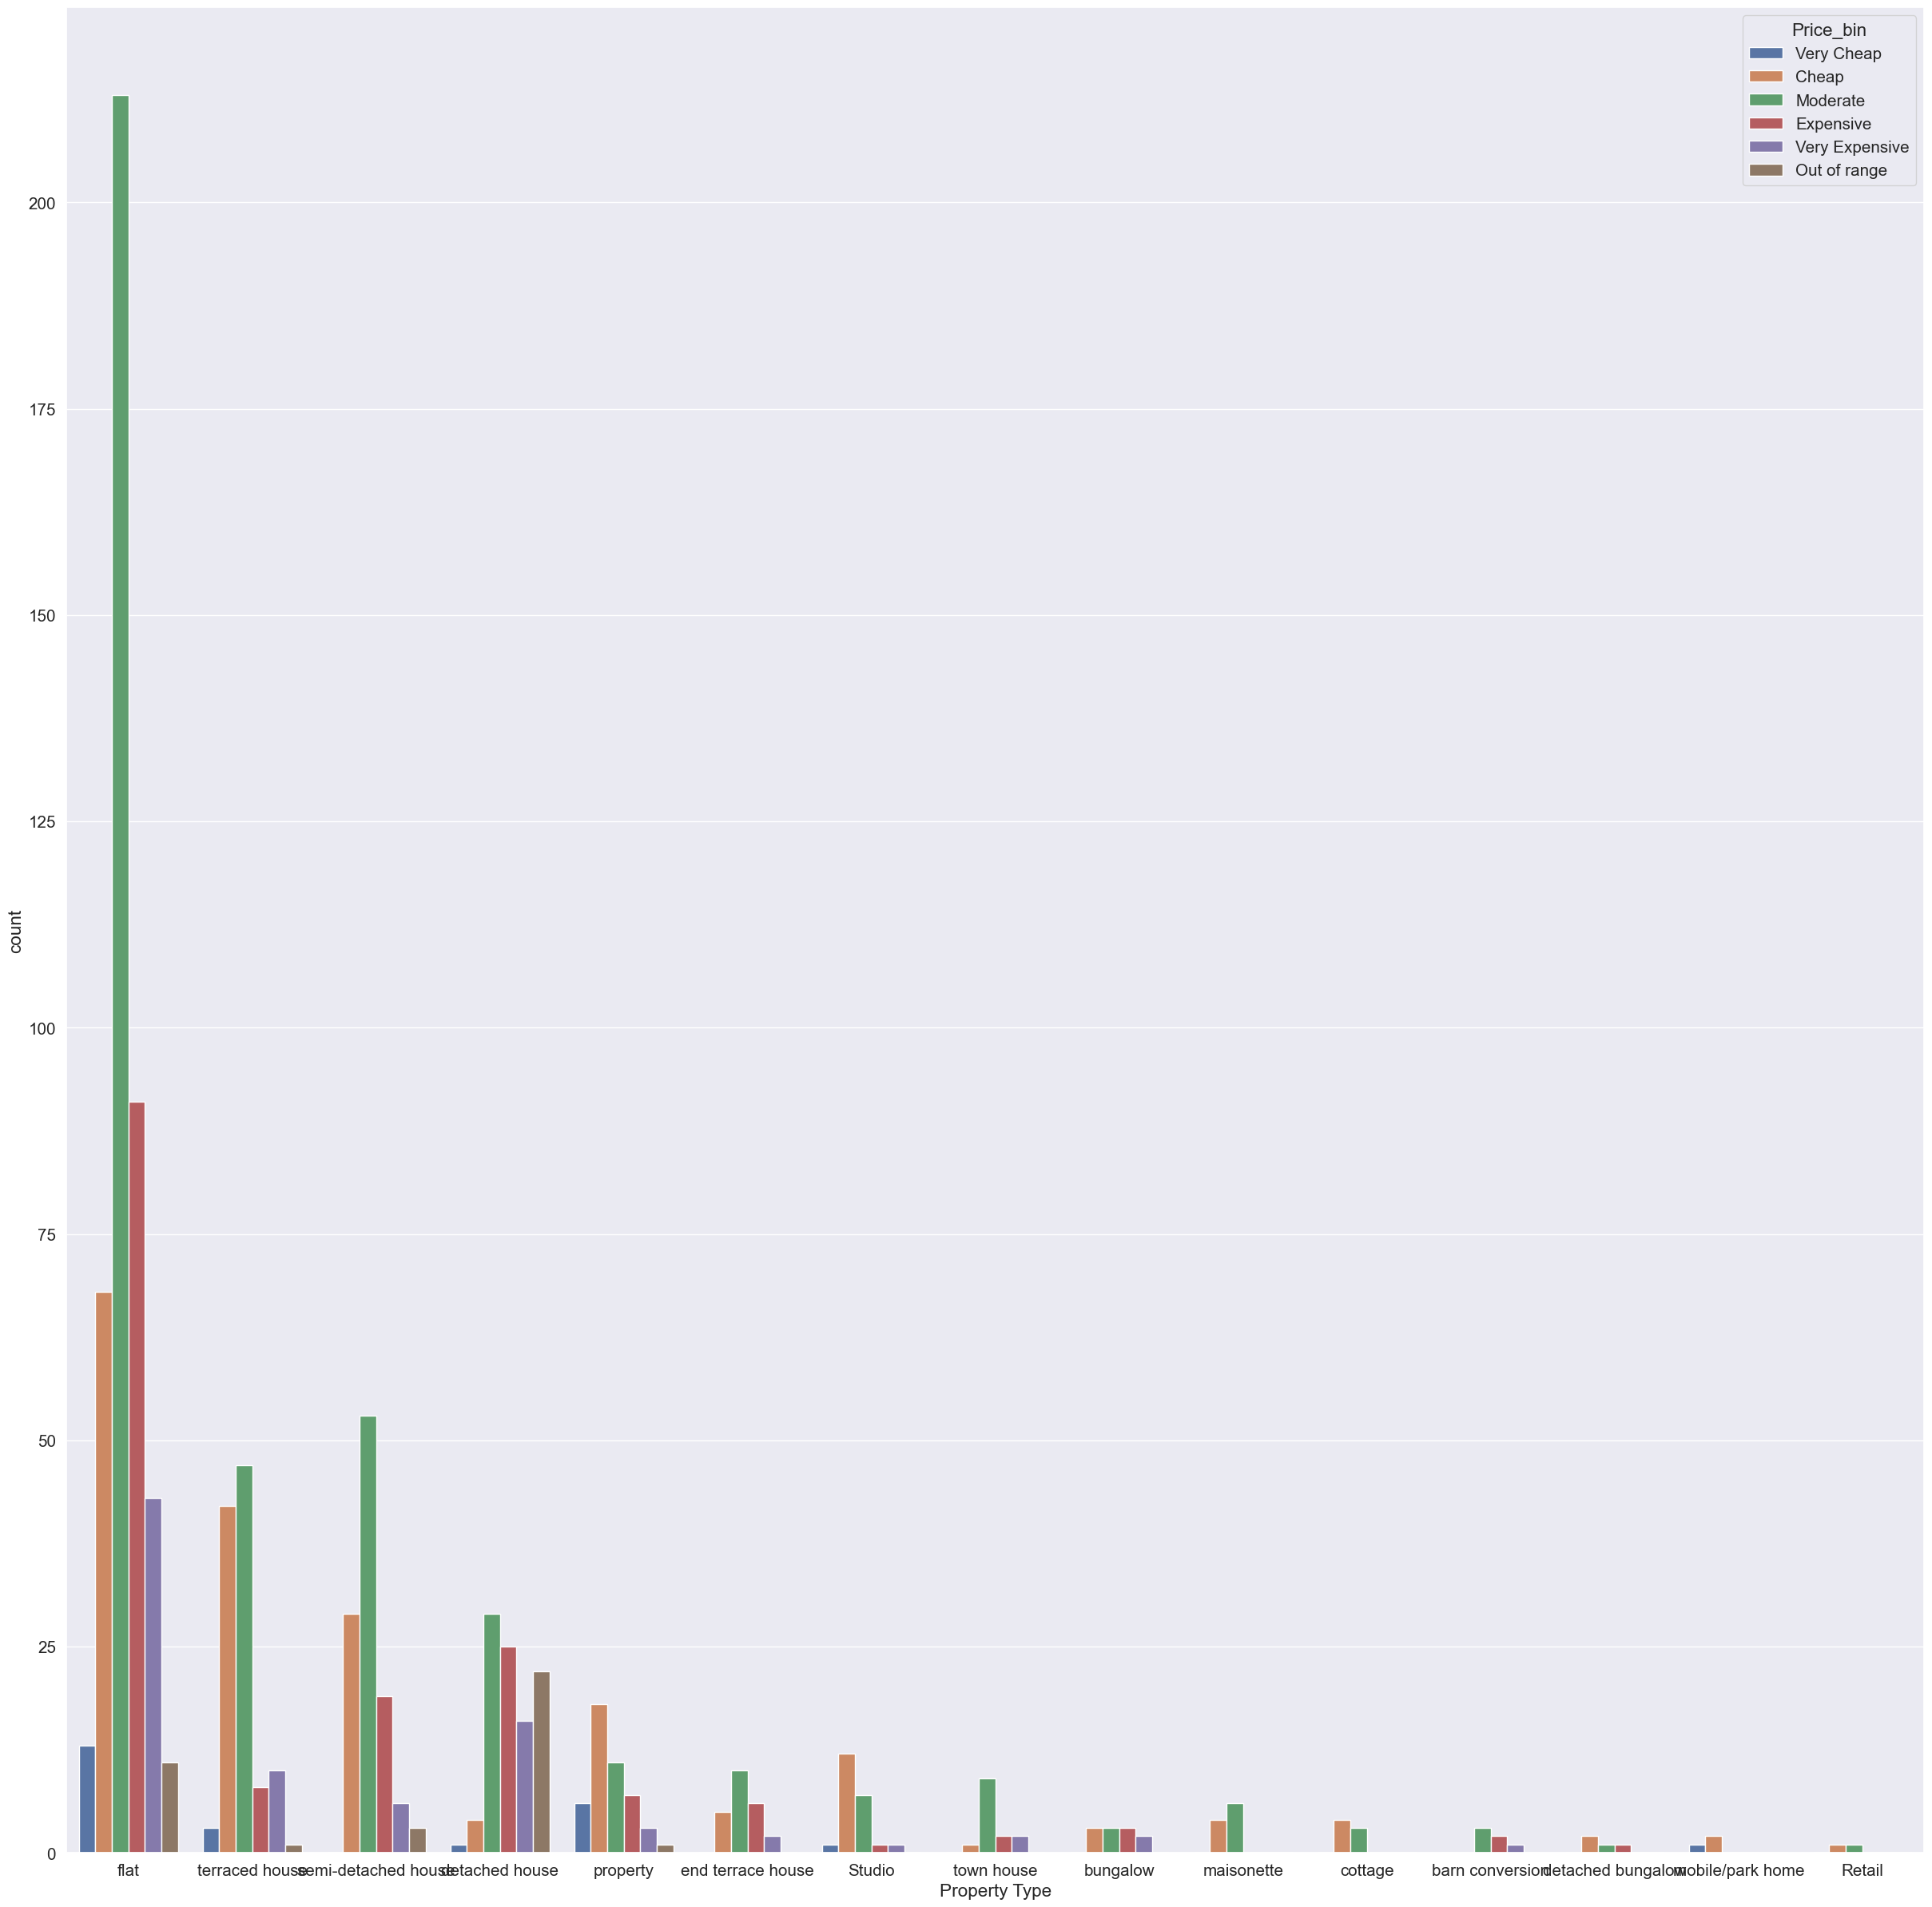

In [20]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.35)
sns.countplot(x='Property Type', order=filtered_data['Property Type'].value_counts()[:15].index, hue = 'Price_bin', data = filtered_data)
plt.show()

### 1.4.5 Classified price of listings across top 5 counties

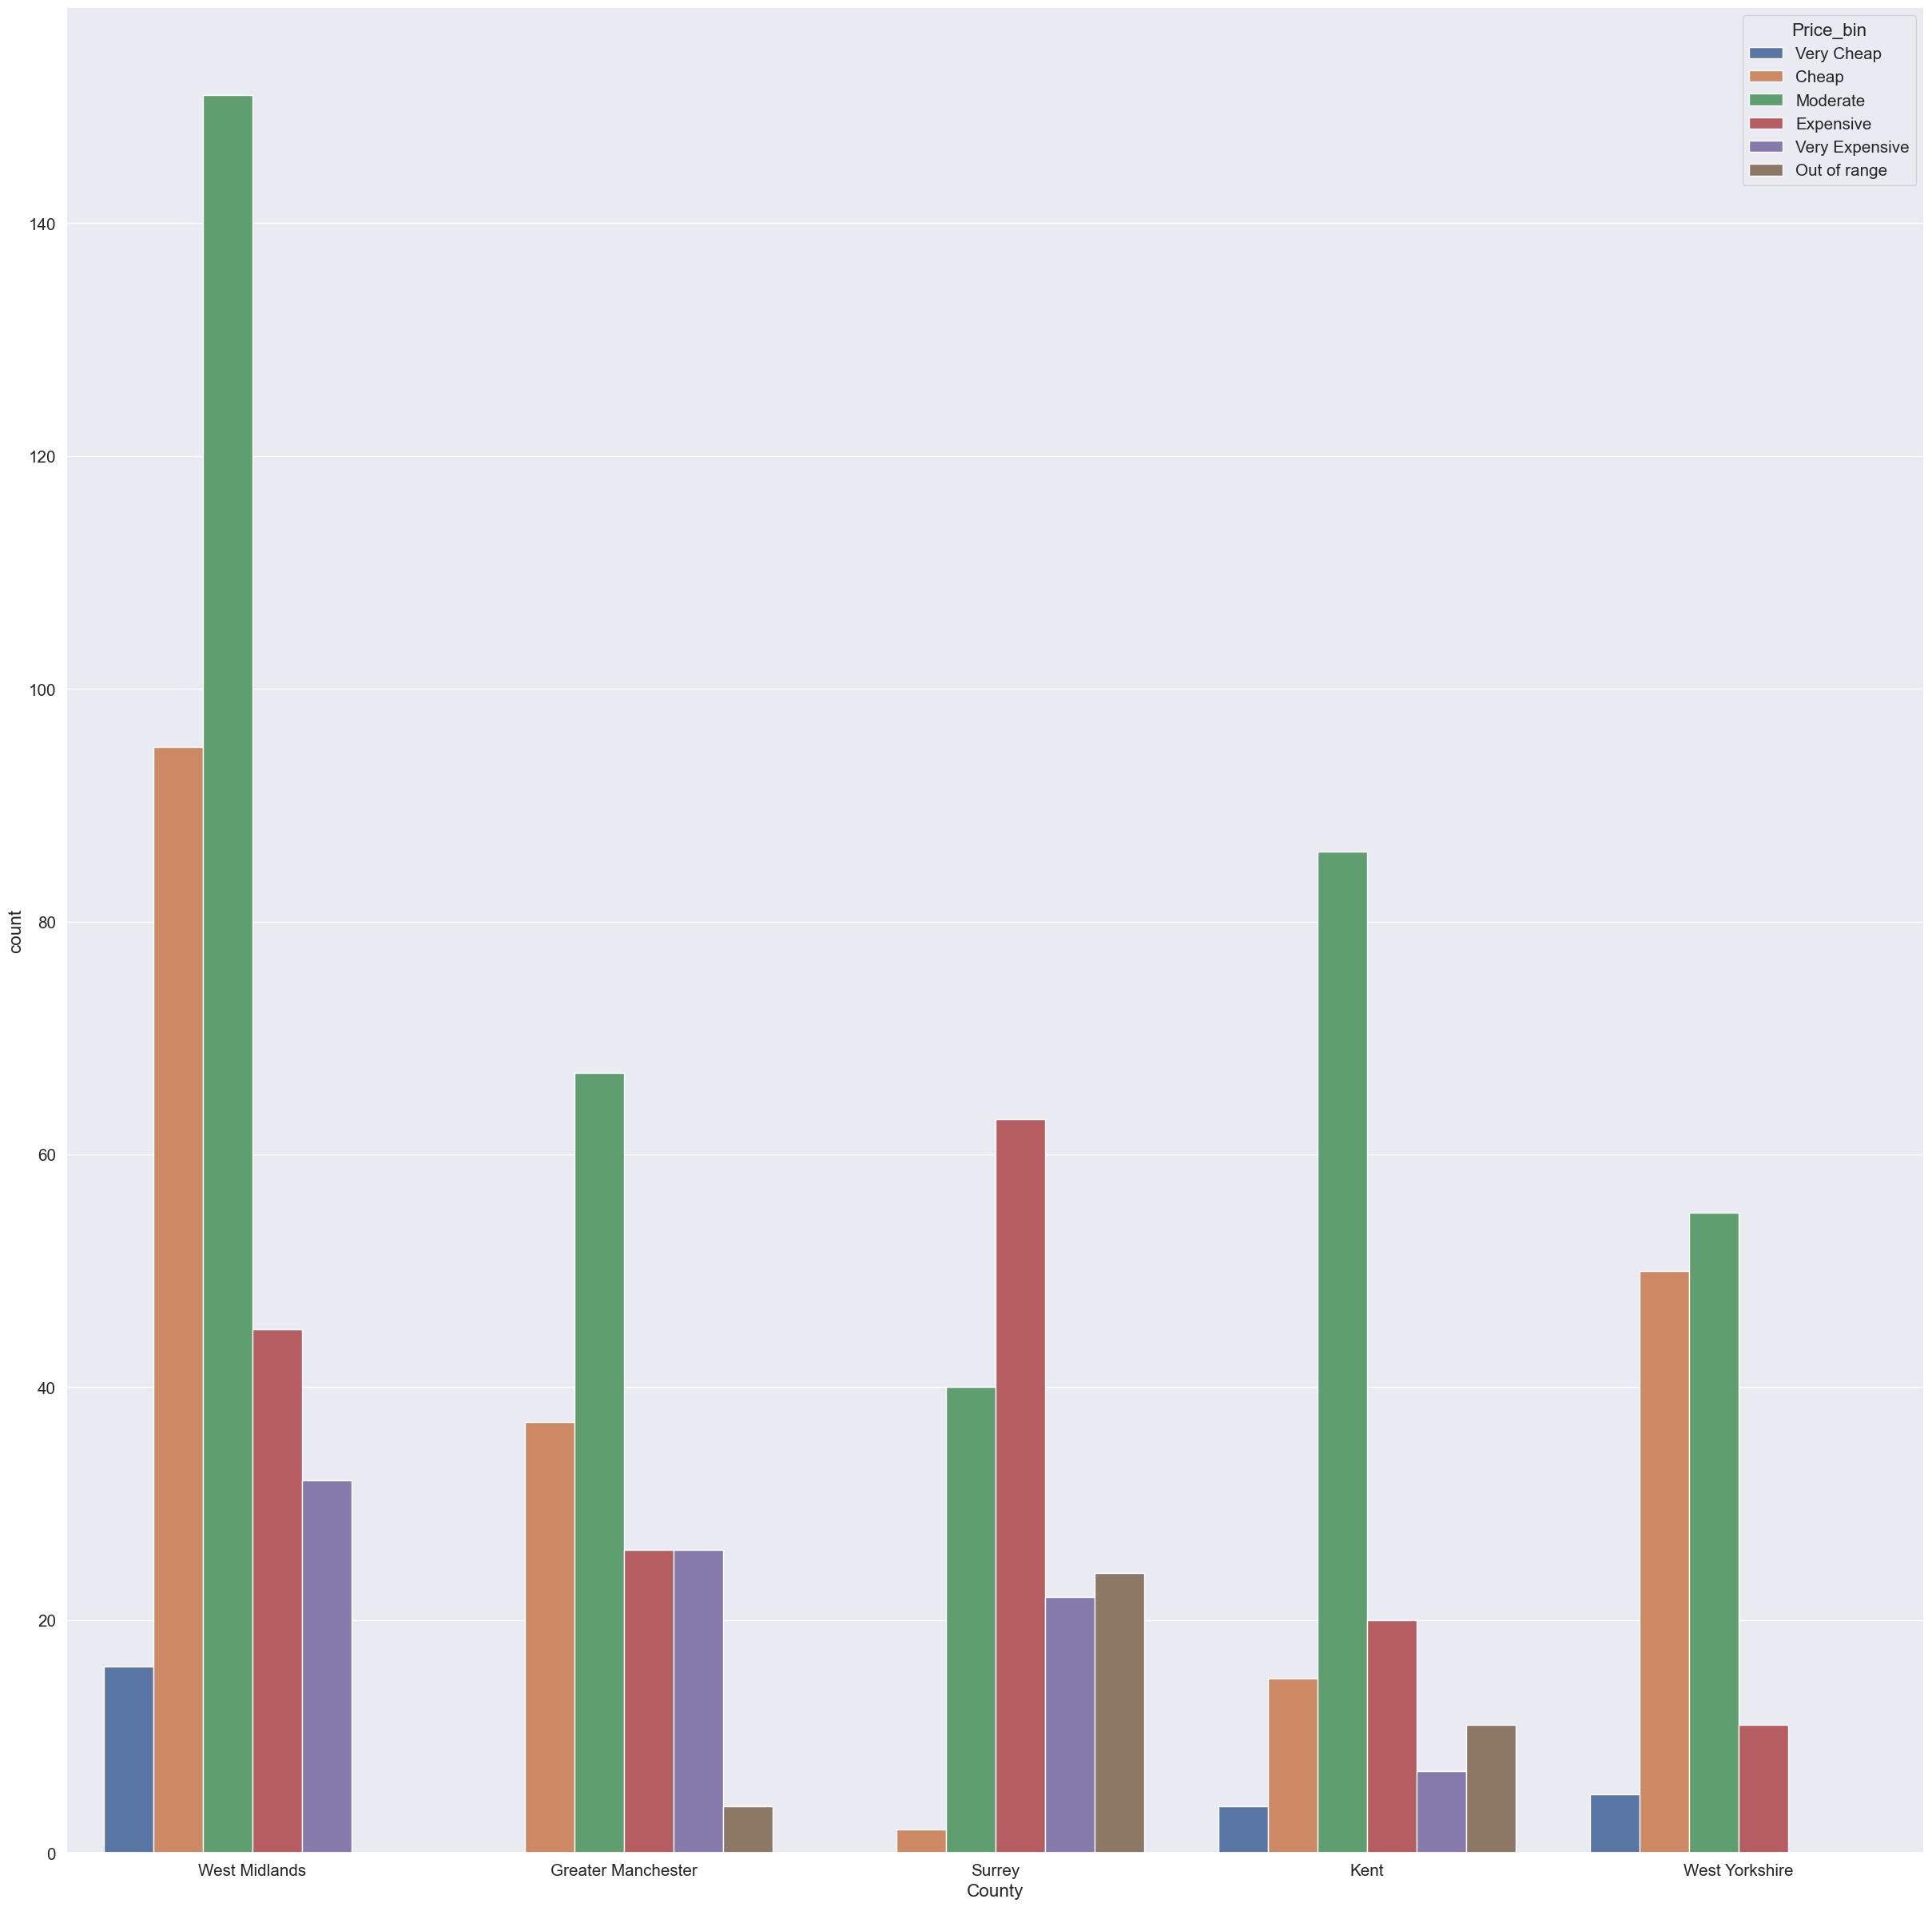

In [249]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.35)
sns.countplot(x='County', order=filtered_data['County'].value_counts()[:15].index, hue = 'Price_bin', data = filtered_data)
plt.show()

## 1.5 Further Data Cleaning for subsequent analysis

In [271]:
listings_data = data[['County', 'Price per month']]

In [285]:
mean_prices = listings_data.groupby('County')['Price per month'].mean().astype(int).reset_index()
median_prices = listings_data.groupby('County')['Price per month'].median().astype(int).reset_index()
listings_data_df = pd.merge(mean_prices, median_prices, on='County')
listings_data_df.columns = ['County', 'Mean Price', 'Median Price']

In [349]:
listings_data_df.head()

,County,Mean Price,Median Price,No of Listings
0,Bath & N E Somerset,1711,1600,25
1,Bedfordshire,1528,1400,23
2,Berkshire,2975,2350,107
3,Bristol,1853,1735,30
4,Buckinghamshire,2281,1872,54


In [282]:
num_listings = listings_data['County'].value_counts()

In [287]:
listings_data_df = pd.merge(listings_data_df, num_listings, on='County')

In [289]:
listings_data_df = listings_data_df.rename(columns={'count':'No of Listings'})

In [290]:
listings_data_df

,County,Mean Price,Median Price,No of Listings
0,Bath & N E Somerset,1711,1600,25
1,Bedfordshire,1528,1400,23
2,Berkshire,2975,2350,107
3,Bristol,1853,1735,30
4,Buckinghamshire,2281,1872,54
5,Cambridgeshire,1982,1697,44
6,Cheshire,1264,1150,27
7,City of London,3546,3622,20
8,Cornwall,1453,1275,24
9,Cumbria,799,800,10


## 1.6 EDA using Census data

### 1.6.1 Reading 'Income' and both 'Population' datasets

In [194]:
income_data = pd.read_csv("income.csv", encoding= 'unicode_escape')

In [195]:
income_data.head()

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,"39,800","47,800","33,100","14,700"
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,"42,200","50,700","35,200","15,500"
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,"40,100","48,000","33,400","14,600"
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,"33,800","40,500","28,200","12,300"
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,"33,400","40,000","27,800","12,200"


In [34]:
pop_change = pd.read_csv("pop_change.csv", encoding= 'unicode_escape')

In [41]:
pop_change.head()

,Code,Name,Geography,Census 2021,Births,Deaths,Births minus Deaths,Internal Migration Inflow,Internal Migration Outflow,Internal Migration Net,International migration Net,Other,Estimated Population 2021,,
0,K04000001,ENGLAND AND WALES,Country,"59,597,415","170,671","132,230","38,441","783,265","778,175","5,090",883,0,"59,641,829",NaN,NaN
1,E92000001,ENGLAND,Country,"56,490,645","162,942","124,015","38,927","756,419","750,461","5,958",889,0,"56,536,419",NaN,NaN
2,E12000001,NORTH EAST,Region,"2,646,260","6,850","6,974",-124,"24,035","23,362",673,-37,0,"2,646,772",NaN,NaN
3,E06000047,County Durham,Unitary Authority,"521,885","1,269","1,461",-192,"4,629","4,976",-347,0,0,"521,346",NaN,NaN
4,E06000005,Darlington,Unitary Authority,"107,740",303,265,38,"1,315",871,444,0,0,"108,222",NaN,NaN


In [38]:
pop_density = pd.read_csv("pop_density.csv", encoding= 'unicode_escape')

In [42]:
pop_density.head()

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,K02000001,UNITED KINGDOM,Country,"242,741","67,026,292",276,"63,285,145",261,"59,113,016",244
1,K03000001,GREAT BRITAIN,Country,"228,948","65,121,729",284,"61,470,827",268,"57,424,178",251
2,K04000001,ENGLAND AND WALES,Country,"151,047","59,641,829",395,"56,170,927",372,"52,359,978",347
3,E92000001,ENGLAND,Country,"130,310","56,536,419",434,"53,107,169",408,"49,449,746",379
4,E12000001,NORTH EAST,Region,"8,581","2,646,772",308,"2,596,441",303,"2,540,090",296


### 1.6.2 Cleaning Income Data, finding Mean Incomes per county

In [196]:
income_data = income_data[['Local authority name', 'Total annual income (£)']]

In [197]:
income_data['Total annual income (£)'].replace(',','', regex=True, inplace=True)
income_data['Total annual income (£)'] = income_data['Total annual income (£)'].astype(str).astype(int)

In [230]:
income_data = income_data.rename(columns={'Local authority name':'Name'})
income_data

,Name,Total annual income (£)
0,County Durham,39800
1,County Durham,42200
2,County Durham,40100
3,County Durham,33800
4,County Durham,33400
...,...,...
7196,Newport,47300
7197,Newport,35800
7198,Newport,28200
7199,Newport,35500


In [231]:
mean_income = income_data.groupby('Name')['Total annual income (£)'].mean().astype(int).reset_index()
mean_income_df = pd.DataFrame(mean_income)

### 1.6.3 Merging both 'Population' datasets by county

In [235]:
def county_matching(name, counties):  
    for county in counties:
        if re.search(r'{}'.format(county), name, re.IGNORECASE):
#             print(name, "-->", county)
            return county  
#     print(name)
    return name

In [236]:
mean_income_df['Name'] = mean_income_df['Name'].apply(lambda x: county_matching(x, counties))

In [242]:
mean_income_df = mean_income_df.groupby('Name')['Total annual income (£)'].mean().astype(int).reset_index()

In [47]:
pop_change = pop_change[['Name', 'Geography', 'Internal Migration Net', 'Estimated Population 2021']]

In [56]:
pop_density = pop_density[['Name', '2021 people per sq. km']]

In [67]:
pop_data = pd.merge(pop_change, pop_density, on='Name', how='left')

In [68]:
pop_data

,Name,Geography,Internal Migration Net,Estimated Population 2021,2021 people per sq. km
0,ENGLAND AND WALES,Country,"5,090","59,641,829",395
1,ENGLAND,Country,"5,958","56,536,419",434
2,NORTH EAST,Region,673,"2,646,772",308
3,County Durham,Unitary Authority,-347,"521,346",234
4,Darlington,Unitary Authority,444,"108,222",548
...,...,...,...,...,...
380,Fermanagh and Omagh,Local Government District,-12,"116,926",41
381,Lisburn and Castlereagh,Local Government District,-55,"149,272",296
382,Mid and East Antrim,Local Government District,39,"139,127",133
383,Mid Ulster,Local Government District,-32,"150,598",83


In [75]:
pop_data = pop_data[pop_data['Geography'] == 'County']
pop_data = pop_data.reset_index(drop=True)
pop_data

,Name,Geography,Internal Migration Net,Estimated Population 2021,2021 people per sq. km
0,Cumbria,County,"1,486","500,821",74
1,Lancashire,County,941,"1,236,035",427
2,North Yorkshire,County,"2,882","618,847",77
3,Derbyshire,County,"2,570","796,847",313
4,Leicestershire,County,295,"712,572",342
5,Lincolnshire,County,"1,408","769,474",130
6,Nottinghamshire,County,"1,624","826,257",396
7,Staffordshire,County,"1,778","877,856",335
8,Warwickshire,County,"2,112","599,153",303
9,Worcestershire,County,"1,554","604,947",348


### 1.6.4 Merging 'Income' and 'Population' datasets

In [295]:
merged_data = pd.merge(pop_data, mean_income_df, on='Name', how='left')

In [297]:
merged_data = merged_data.drop('Geography', axis=1)

In [299]:
merged_data = merged_data.rename(columns={'Name':'County'})
merged_data

,County,Internal Migration Net,Estimated Population 2021,2021 people per sq. km,Total annual income (£)
0,Cumbria,"1,486","500,821",74,NaN
1,Lancashire,941,"1,236,035",427,39740.0
2,North Yorkshire,"2,882","618,847",77,NaN
3,Derbyshire,"2,570","796,847",313,43798.0
4,Leicestershire,295,"712,572",342,44023.0
5,Lincolnshire,"1,408","769,474",130,35721.0
6,Nottinghamshire,"1,624","826,257",396,NaN
7,Staffordshire,"1,778","877,856",335,41339.0
8,Warwickshire,"2,112","599,153",303,42071.0
9,Worcestershire,"1,554","604,947",348,NaN


In [315]:
final_data = pd.merge(listings_data_df, merged_data, on='County')

In [324]:
final_data

,County,Mean Price,Median Price,No of Listings,Internal Migration Net,Estimated Population 2021,2021 people per sq. km,Total annual income (£)
1,Cumbria,799,800,10,1486,"500,821",74,NaN
10,Lancashire,817,695,53,941,"1,236,035",427,39740.0
2,Derbyshire,1056,897,32,2570,"796,847",313,43798.0
12,Lincolnshire,1081,925,50,1408,"769,474",130,35721.0
18,Staffordshire,1102,925,33,1778,"877,856",335,41339.0
23,Worcestershire,1260,1122,18,1554,"604,947",348,NaN
11,Leicestershire,1280,1320,53,295,"712,572",342,44023.0
13,Norfolk,1302,1275,39,2496,"918,369",171,40957.0
17,Somerset,1334,1175,24,1661,"573,119",166,40521.0
14,North Yorkshire,1416,1350,67,2882,"618,847",77,NaN


In [317]:
final_data = final_data.sort_values('Mean Price')

## 1.7 Exploring the Data

### 1.7.1 Population and Mean/Median Price

In [328]:
final_data.dtypes

County                        object
Mean Price                     int32
Median Price                   int32
No of Listings                 int64
Internal Migration Net         int32
Estimated Population 2021      int32
2021 people per sq. km        object
Total annual income (£)      float64
dtype: object

In [325]:
final_data['Internal Migration Net'].replace(',','', regex=True, inplace=True)
final_data['Internal Migration Net'] = final_data['Internal Migration Net'].astype(str).astype(int)

In [327]:
final_data['Estimated Population 2021'].replace(',','', regex=True, inplace=True)
final_data['Estimated Population 2021'] = final_data['Estimated Population 2021'].astype(str).astype(int)

In [329]:
final_data['2021 people per sq. km'].replace(',','', regex=True, inplace=True)
final_data['2021 people per sq. km'] = final_data['2021 people per sq. km'].astype(str).astype(int)

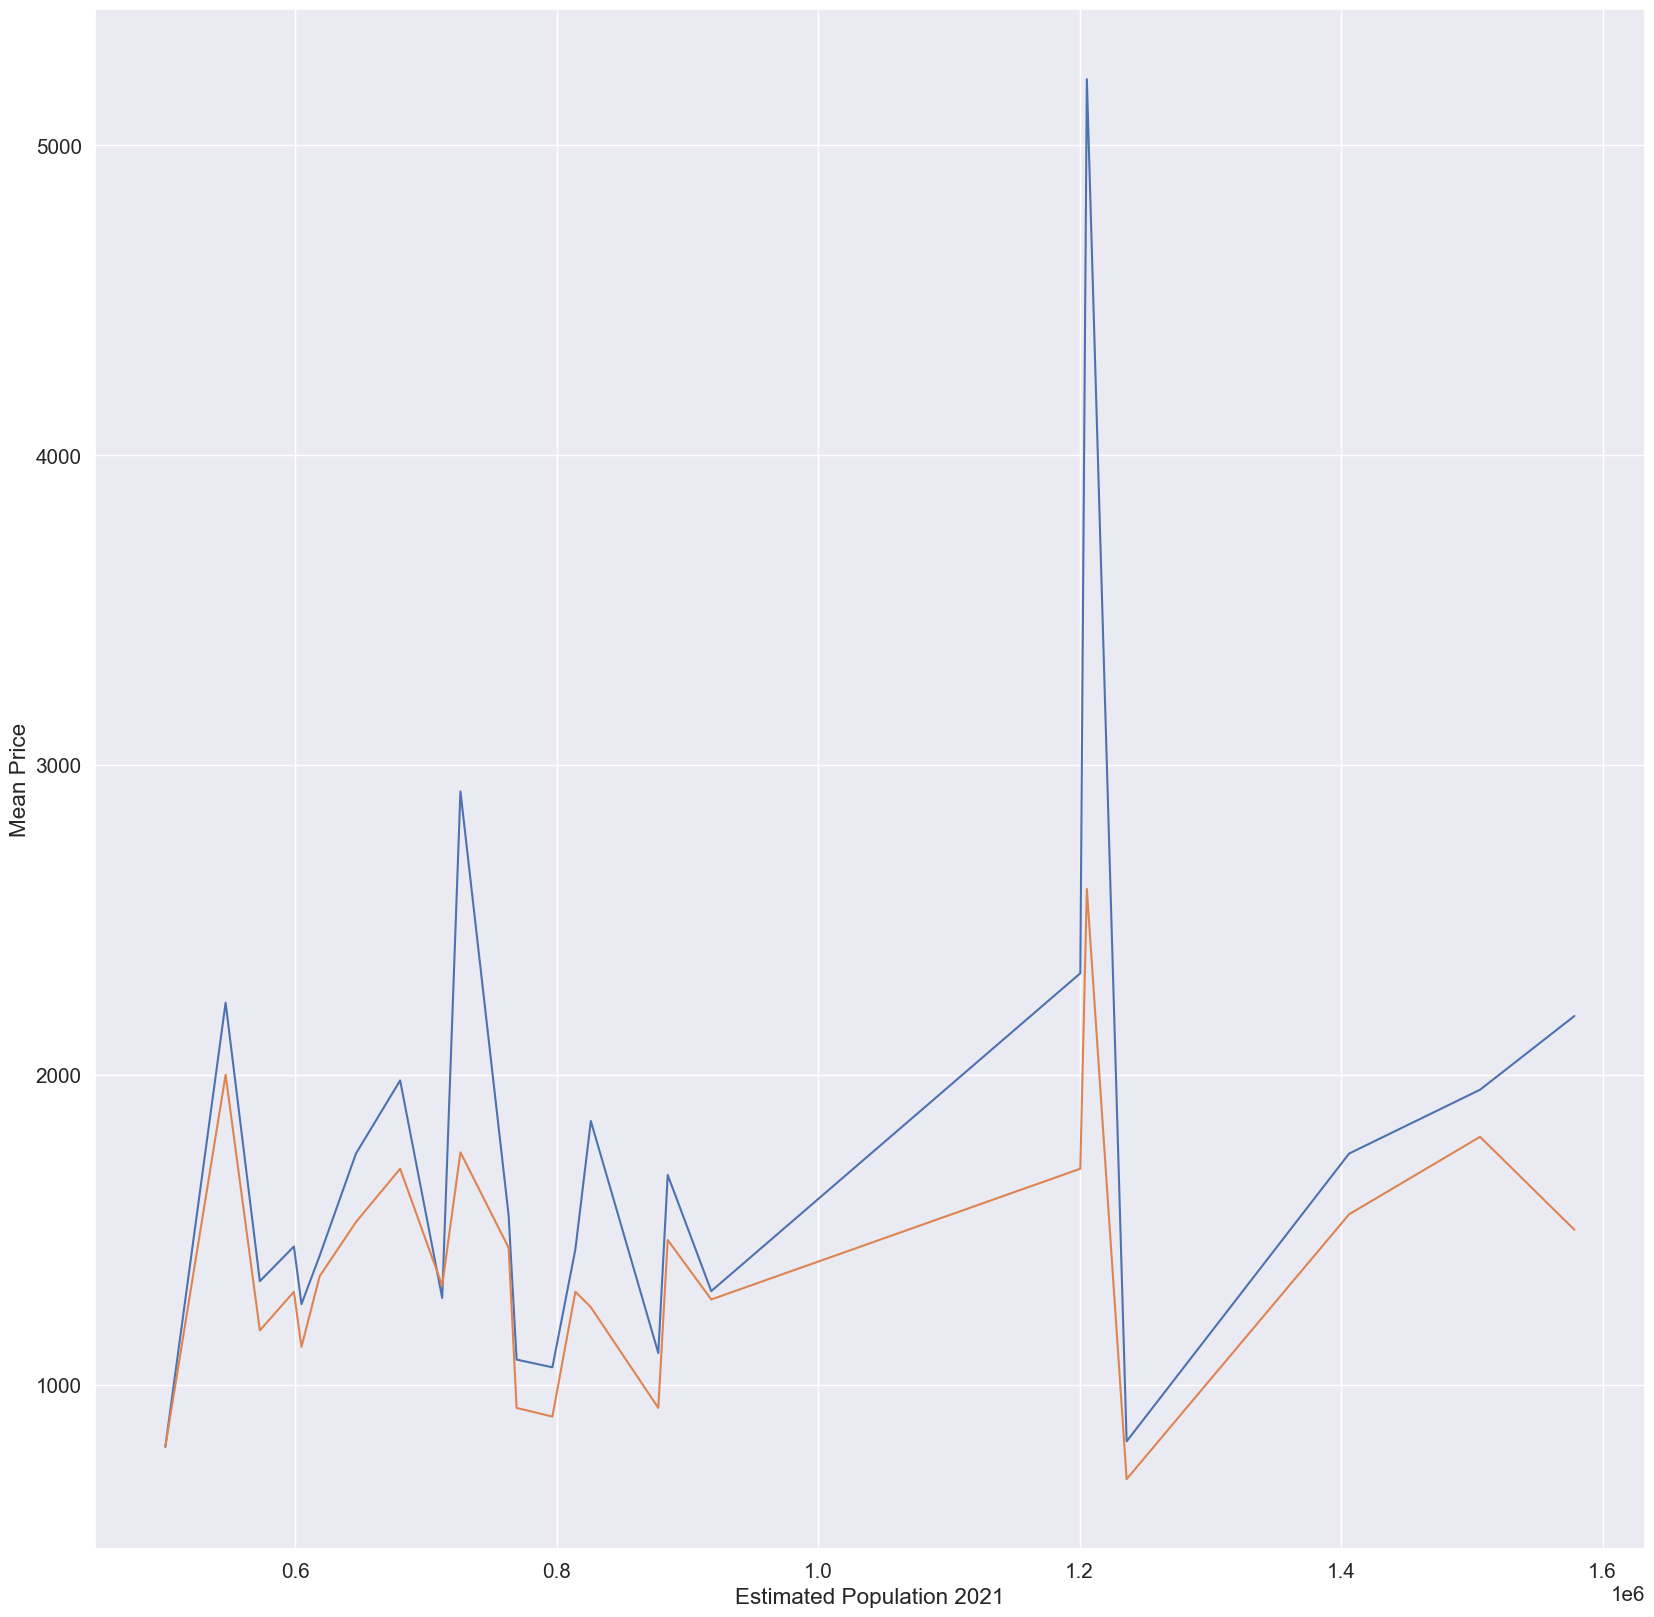

In [333]:
plt.figure(figsize=(20, 20))
sns.lineplot(data=final_data, x='Estimated Population 2021', y='Mean Price')
sns.lineplot(data=final_data, x='Estimated Population 2021', y='Median Price')
plt.show()

### 1.7.2 Number of listings and Population

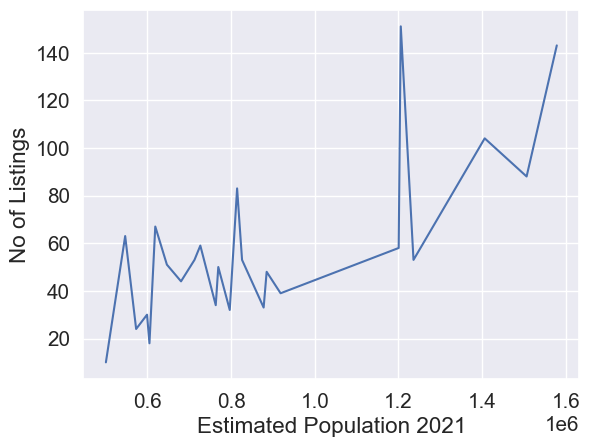

In [344]:
sns.lineplot(data=final_data, x='Estimated Population 2021', y='No of Listings')
plt.show()

### 1.7.3 Number of listings and Mean Price

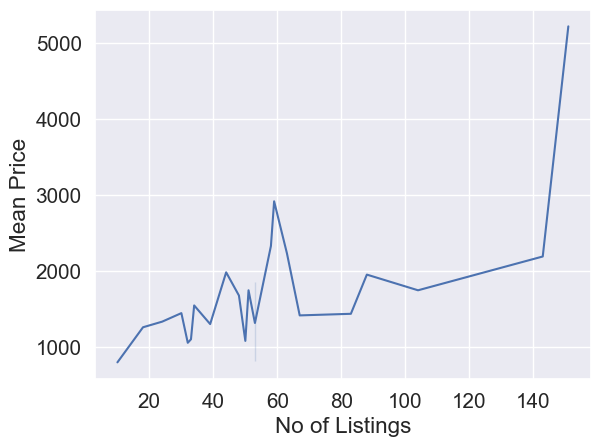

In [343]:
sns.lineplot(data=final_data, x='No of Listings', y='Mean Price')
plt.show()

### 1.7.4 Net migration and Price

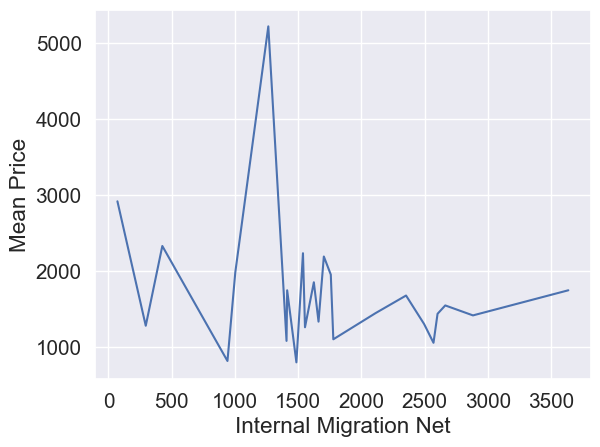

In [342]:
sns.lineplot(data=final_data, x='Internal Migration Net', y='Mean Price')
plt.show()

### 1.7.5 Pop density and Mean Price

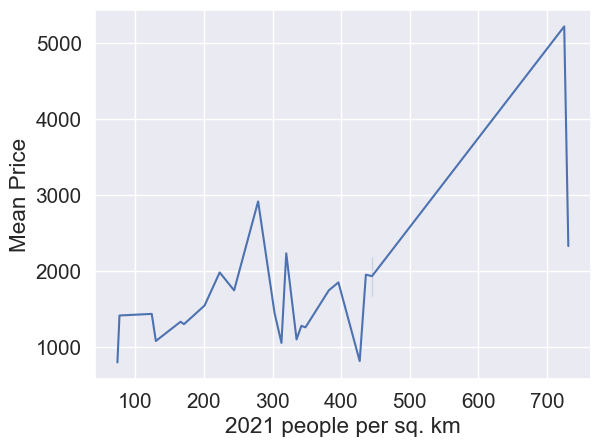

In [341]:
sns.lineplot(data=final_data, x='2021 people per sq. km', y='Mean Price')
plt.show()

### 1.7.6 Annual Income and Mean Price

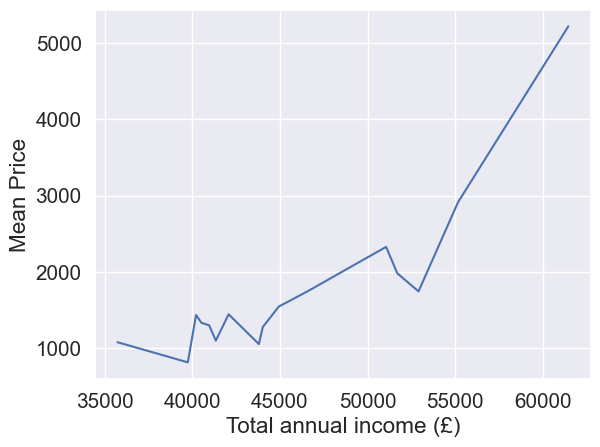

In [345]:
sns.lineplot(data=final_data, x='Total annual income (£)', y='Mean Price')
plt.show()

### 1.7.7 Annual Income and Number of Listings

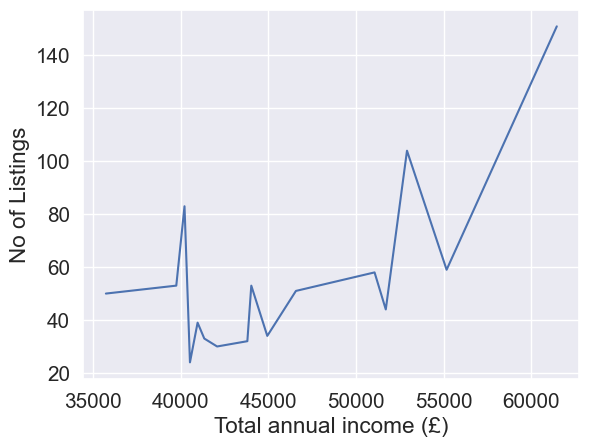

In [347]:
sns.lineplot(data=final_data, x='Total annual income (£)', y='No of Listings')
plt.show()

### 1.7.8 Pop Density and Number of Listings

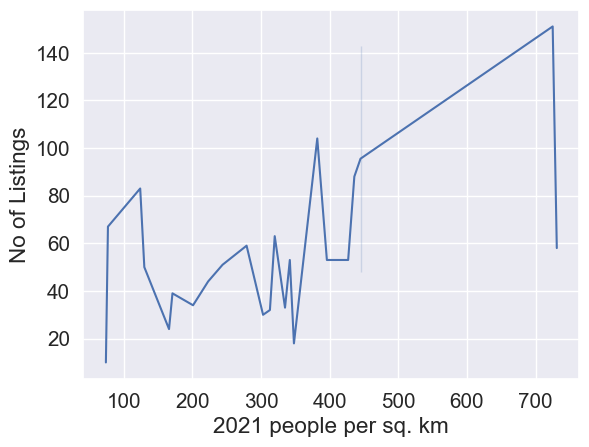

In [348]:
sns.lineplot(data=final_data, x='2021 people per sq. km', y='No of Listings')
plt.show()